In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel


In [2]:
df = pd.read_csv('pd_speech_features.csv', header=1)

In [3]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [5]:
df.shape

(756, 755)

In [6]:
#Sprawdzanie brakujacych danych
df[df.isnull().any(axis=1)]

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class


In [7]:
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

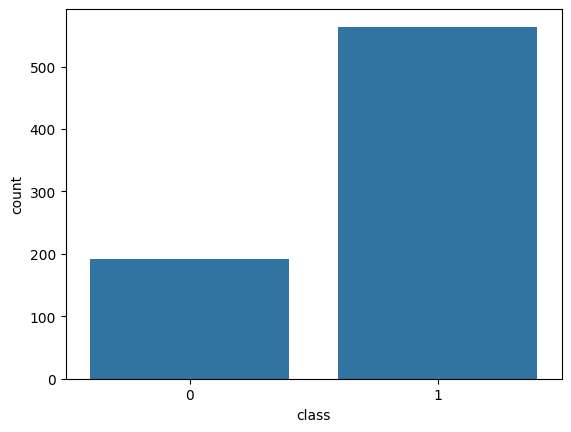

In [8]:
sns.countplot(data=df, x= 'class')

In [9]:
#Korelacja miedzy cechami
df.corr()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,1.000000,-0.133605,0.026667,0.041938,-0.084606,0.085828,0.085226,-0.100831,-0.060464,-0.052865,...,0.036897,0.016047,-0.023317,-0.045943,-0.041835,-0.053781,-0.058034,-0.057807,-0.055775,-0.111661
gender,-0.133605,1.000000,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,...,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828,0.182713
PPE,0.026667,0.010175,1.000000,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,...,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588,-0.072939
DFA,0.041938,0.099356,-0.094775,1.000000,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,...,-0.146325,-0.104456,-0.061129,-0.063451,-0.061845,-0.033914,0.043454,0.067843,0.116699,0.306070
RPDE,-0.084606,0.168321,-0.405558,0.155075,1.000000,-0.521193,-0.524839,0.506707,0.333545,0.614340,...,-0.315592,-0.278504,-0.148989,-0.101467,-0.098923,-0.097161,-0.036406,-0.018052,0.021945,0.247444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,-0.053781,0.107618,0.045755,-0.033914,-0.097161,-0.047946,-0.047837,0.039487,-0.092429,0.018504,...,0.239203,0.486570,0.708646,0.841365,0.945107,1.000000,0.824620,0.698738,0.543845,0.119808
tqwt_kurtosisValue_dec_34,-0.058034,0.128936,0.046175,0.043454,-0.036406,-0.068664,-0.068561,0.046140,-0.061721,0.027886,...,0.139668,0.383328,0.587449,0.667325,0.729501,0.824620,1.000000,0.948008,0.785141,0.192345
tqwt_kurtosisValue_dec_35,-0.057807,0.107734,0.037385,0.067843,-0.018052,-0.069645,-0.069468,0.040828,-0.067636,0.010553,...,0.054510,0.275390,0.477147,0.550686,0.609663,0.698738,0.948008,1.000000,0.866696,0.219454
tqwt_kurtosisValue_dec_36,-0.055775,0.104828,0.039588,0.116699,0.021945,-0.062925,-0.062790,0.031685,-0.067147,0.003805,...,-0.108280,0.070046,0.290106,0.386061,0.467944,0.543845,0.785141,0.866696,1.000000,0.279827


<Axes: >

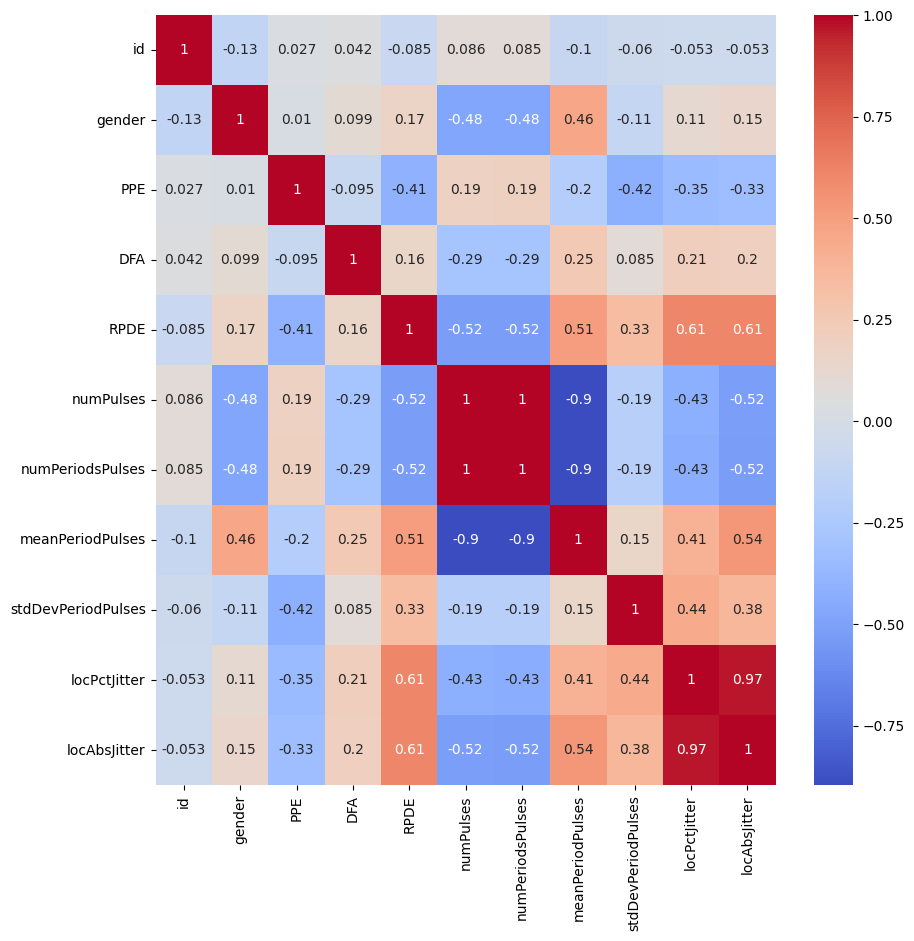

In [10]:
#Heatmapa dla 10 cech
corr=df.iloc[:,0:11].corr()
ten_features=corr.index
plt.figure(figsize=(10,10))
sns.heatmap(df[ten_features].corr(),annot=True, cmap = 'coolwarm')

In [11]:
#Funkcja, która zwróci nam nazwy cech, których wartość korelacji jest większa niż wartość progowa, a następnie będziemy mogli je usunąć.
def find_correlated_features(data_frame, limit):
    correlated_features = set()
    correlation_matrix = data_frame.corr()
    num_columns = len(correlation_matrix.columns)

    for row_idx in range(num_columns):
        for col_idx in range(row_idx):
            if abs(correlation_matrix.iloc[row_idx, col_idx]) > limit:
                column_name = correlation_matrix.columns[row_idx]
                correlated_features.add(column_name)
    return correlated_features

In [12]:
correlated_features = find_correlated_features(df.iloc[:,0:755],0.8)
correlated_features

{'Ea2',
 'Ed2_10_coef',
 'Ed2_1_coef',
 'Ed2_2_coef',
 'Ed2_3_coef',
 'Ed2_4_coef',
 'Ed2_5_coef',
 'Ed2_6_coef',
 'Ed2_7_coef',
 'Ed2_8_coef',
 'Ed2_9_coef',
 'Ed_10_coef',
 'Ed_2_coef',
 'Ed_3_coef',
 'Ed_5_coef',
 'Ed_6_coef',
 'Ed_8_coef',
 'Ed_9_coef',
 'GNE_NSR_TKEO',
 'IMF_NSR_entropy',
 'VFER_entropy',
 'app_LT_TKEO_mean_10_coef',
 'app_LT_TKEO_mean_2_coef',
 'app_LT_TKEO_mean_3_coef',
 'app_LT_TKEO_mean_4_coef',
 'app_LT_TKEO_mean_5_coef',
 'app_LT_TKEO_mean_6_coef',
 'app_LT_TKEO_mean_7_coef',
 'app_LT_TKEO_mean_8_coef',
 'app_LT_TKEO_mean_9_coef',
 'app_LT_TKEO_std_10_coef',
 'app_LT_TKEO_std_1_coef',
 'app_LT_TKEO_std_2_coef',
 'app_LT_TKEO_std_3_coef',
 'app_LT_TKEO_std_4_coef',
 'app_LT_TKEO_std_5_coef',
 'app_LT_TKEO_std_6_coef',
 'app_LT_TKEO_std_7_coef',
 'app_LT_TKEO_std_8_coef',
 'app_LT_TKEO_std_9_coef',
 'app_LT_entropy_log_10_coef',
 'app_LT_entropy_log_1_coef',
 'app_LT_entropy_log_2_coef',
 'app_LT_entropy_log_3_coef',
 'app_LT_entropy_log_4_coef',
 'app_LT_entr

In [13]:
len(correlated_features)

472

In [14]:
#Usuwanie skorelowanych kolumn
cols = list(correlated_features)
df.drop(df[cols],axis=1, inplace=True)

In [15]:
df.shape

(756, 283)

Po odrzuceniu cech silnie skorelowanych pozostaje nam 282 cechy, które zostaną wykorzystane w dalszej budowie modelu.

In [16]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,...,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30,class
0,0,1,0.85247,0.71826,0.57227,240,0.000087,0.00218,0.05883,0.970805,...,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,3.8686,1
1,0,1,0.76686,0.69481,0.53966,234,0.000073,0.00195,0.05516,0.984322,...,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,23.5155,1
2,0,1,0.85083,0.67604,0.58982,232,0.000060,0.00176,0.09902,0.974846,...,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,9.4959,1
3,1,0,0.41121,0.79672,0.59257,178,0.000183,0.00419,0.05451,0.968343,...,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,5.2558,1
4,1,0,0.32790,0.79782,0.53028,236,0.002669,0.00535,0.05610,0.975754,...,1.9056,2.2214,2.0588,1.8157,1.7577,1.8821,7.8832,6.1727,6.0805,1


In [17]:
# Oddzielenie zmiennej docelowej od cech
X=df.iloc[:,:-1]
y=df['class']

In [18]:
X.head()

,id,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,...,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30
0,0,1,0.85247,0.71826,0.57227,240,0.000087,0.00218,0.05883,0.970805,...,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,3.8686
1,0,1,0.76686,0.69481,0.53966,234,0.000073,0.00195,0.05516,0.984322,...,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,23.5155
2,0,1,0.85083,0.67604,0.58982,232,0.000060,0.00176,0.09902,0.974846,...,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,9.4959
3,1,0,0.41121,0.79672,0.59257,178,0.000183,0.00419,0.05451,0.968343,...,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,5.2558
4,1,0,0.32790,0.79782,0.53028,236,0.002669,0.00535,0.05610,0.975754,...,2.1073,1.9056,2.2214,2.0588,1.8157,1.7577,1.8821,7.8832,6.1727,6.0805


In [19]:
#Podział na dane uczące i testujące
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state = 0)

In [20]:
X_train.shape

(642, 282)

In [21]:
X_test.shape

(114, 282)

In [22]:
print("Liczba klas o numerze: 1: {}".format(sum(y_train == 1)))
print("Liczba klas o numerze: 0: {} \n".format(sum(y_train == 0)))

Liczba klas o numerze: 1: 477
Liczba klas o numerze: 0: 165 



Widzimy, że dane są niezrównoważone, mając tylko 25% klasy mniejszości.

Aby zrównoważyć nasze dane szkoleniowe, użyjemy techniki nadpróbkowania SMOTE do stworzenia nowych, syntetycznych próbek naszej klasy mniejszości.

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [24]:
print("Liczba klas o numerze: 1: {}".format(sum(y_train == 1)))
print("Liczba klas o numerze: 0: {} \n".format(sum(y_train == 0)))

Liczba klas o numerze: 1: 477
Liczba klas o numerze: 0: 477 



Mamy teraz taką samą liczbę pozytywów i negatywów.

In [25]:
from sklearn.model_selection import GridSearchCV
# Definicja gridu parametrów do przeszukania
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 450, 500],
}

# Inicjalizacja Grid Search z użyciem klasyfikatora i gridu parametrów
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów i najlepszego wyniku
print("Najlepsze parametry: ", grid_search.best_params_)
print("Najlepszy wynik: ", grid_search.best_score_)

Najlepsze parametry:  {'n_estimators': 300}
Najlepszy wynik:  0.9423808211628547


In [26]:
#Tworzenie losowego klasyfikatora leśnego
classifier = RandomForestClassifier(n_estimators=300)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [27]:
# Walidacja krzyżowa
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
print("Średnia dokładność z walidacji krzyżowej: ", cross_val_scores.mean())

Średnia dokładność z walidacji krzyżowej:  0.828093412338794


In [28]:
# Obliczanie AUC-ROC
from sklearn.metrics import roc_auc_score
y_pred_proba = classifier.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC: ", auc_roc)

AUC-ROC:  0.901021711366539


In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Dokładność : {} %'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

[[19  8]
 [ 6 81]]
Dokładność : 87.71929824561403 %
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.91      0.93      0.92        87

    accuracy                           0.88       114
   macro avg       0.84      0.82      0.83       114
weighted avg       0.87      0.88      0.88       114



### Poniżej próba zwiększenia dokładności

In [31]:
#50 najlepszych cech, które wniosły większy wkład w tworzenie modeli
temp_cols =pd.Series(classifier.feature_importances_,index=X.columns)
temp_cols.nlargest(50)

mean_MFCC_2nd_coef               0.026447
tqwt_energy_dec_12               0.024712
std_11th_delta                   0.022162
tqwt_kurtosisValue_dec_26        0.022074
minIntensity                     0.021899
tqwt_TKEO_mean_dec_17            0.020400
std_9th_delta                    0.020366
tqwt_kurtosisValue_dec_27        0.019016
std_Log_energy                   0.015918
tqwt_TKEO_mean_dec_36            0.015602
tqwt_entropy_shannon_dec_36      0.015020
mean_MFCC_3rd_coef               0.011802
tqwt_kurtosisValue_dec_20        0.011797
tqwt_entropy_log_dec_26          0.011646
VFER_mean                        0.010981
DFA                              0.010477
mean_MFCC_6th_coef               0.010373
locPctJitter                     0.010271
tqwt_energy_dec_5                0.009140
tqwt_energy_dec_17               0.008923
tqwt_energy_dec_25               0.008655
f1                               0.008638
std_MFCC_4th_coef                0.008439
tqwt_entropy_shannon_dec_34      0

In [32]:
cols = temp_cols.nlargest(50).index

In [33]:
#Wybieramy najmniejsza wartosc, czyli 0.005326 i zaokraglamy ja do 0.0053
sfm = SelectFromModel(classifier, threshold = 0.0053)

In [34]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=300),
                threshold=0.0053)

In [35]:
sfm.get_support(indices=True)

array([  1,   3,   5,   7,  10,  11,  27,  33,  35,  37,  41,  42,  45,
        79,  83,  85,  93,  94,  95, 105, 108, 110, 112, 113, 114, 115,
       123, 124, 132, 145, 146, 147, 148, 151, 152, 155, 156, 166, 202,
       259, 271, 272, 275, 278, 279, 280], dtype=int64)

In [36]:
#Przekształcenie danych, aby utworzyć nowy zestaw danych zawierający tylko najważniejsze cechy.
X_the_most_important_train = sfm.transform(X_train)
X_the_most_important_test = sfm.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Definicja gridu parametrów do przeszukania
param_grid = {
     'n_estimators': [50, 100, 150, 200, 250, 300, 450, 500],
}

# Inicjalizacja Grid Search z użyciem klasyfikatora i gridu parametrów
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Wyświetlenie najlepszych parametrów i najlepszego wyniku
print("Najlepsze parametry: ", grid_search.best_params_)
print("Najlepszy wynik: ", grid_search.best_score_)

In [ ]:
clf_the_most_important = RandomForestClassifier(n_estimators= 300)
clf_the_most_important.fit(X_the_most_important_train, y_train)

In [ ]:
# Walidacja krzyżowa
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(clf_the_most_important, X, y, cv=5, scoring='accuracy')
print("Średnia dokładność z walidacji krzyżowej: ", cross_val_scores.mean())

In [ ]:
# Obliczanie AUC-ROC
from sklearn.metrics import roc_auc_score
y_pred_proba = clf_the_most_important.predict_proba(X_the_most_important_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC: ", auc_roc)

In [ ]:
#Zastosowanie klasyfikatora
y_pred = clf_the_most_important.predict(X_the_most_important_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Dokładność : {} %'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

Dokładność wzrosła o kilka % po użyciu 50 najlepszych cech zamiast 281.

### Sprawdzanie innych modeli

In [ ]:
# Importowanie i stosowanie standardowej skalaryzacji
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_X_important_train = standard_scaler.fit_transform(X_the_most_important_train)
scaled_X_important_test = standard_scaler.transform(X_the_most_important_test)

In [ ]:
# Definiowanie modeli klasyfikacyjnych
classification_models = [
    ('Logistic Regression', 'LR', LogisticRegression()),
    ('K-Nearest Neighbors', 'K-NN', KNeighborsClassifier()),
    ('Support Vector Machine', 'SVC', SVC()),
    ('Naive Bayes', 'NB', GaussianNB()),
    ('Random Forest', 'RF', RandomForestClassifier())
]

# Przechowywanie wyników i nazw modeli
model_performance = []
model_names = []

# Używanie cross-validation
from sklearn import model_selection

for full_model_name, model_name, classifier in classification_models:
    cross_val_fold = model_selection.KFold(n_splits=10)
    cross_val_scores = model_selection.cross_val_score(classifier, scaled_X_important_train, y_train, cv=cross_val_fold, scoring='accuracy')
    model_performance.append(cross_val_scores)
    model_names.append(model_name)
    result_message = f"{full_model_name}: {cross_val_scores.mean() * 100:.2f}% ({cross_val_scores.std() * 100:.2f}%)"
    print(result_message)

# Porównanie algorytmów za pomocą wykresu pudełkowego
import matplotlib.pyplot as plt

comparison_figure = plt.figure()
comparison_figure.suptitle('Porównanie algorytmów klasyfikacyjnych')
comparison_axes = comparison_figure.add_subplot(111)
plt.boxplot(model_performance)
comparison_axes.set_xticklabels(model_names)
plt.show()